In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, SimpleRNN, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

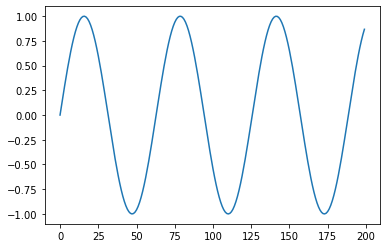

In [5]:
seq = np.sin(np.arange(200)*0.1)
plt.plot(seq)

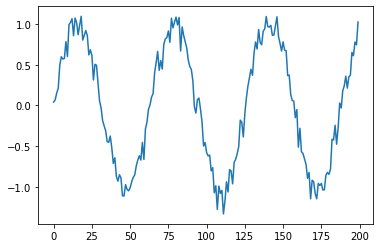

In [8]:
noisy_seq = np.sin(np.arange(200)*0.1)+ np.random.randn(200)*0.1
plt.plot(noisy_seq)

In [11]:
T = 10
X = []
Y = []
for t in range(len(seq)-T):
  x = seq[t:t+T]
  y = seq[t+T]
  X.append(x)
  Y.append(y)
Y = np.array(Y)
X = np.array(X).reshape(-1,T,1)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (190, 10, 1) Y.shape (190,)


In [12]:
i = Input(shape=(T,1))
x = SimpleRNN(15)(i)
x = Dense(1)(x)
model = Model(i,x)

In [14]:
model.compile(loss='mse', optimizer=Adam(lr=0.001))
r = model.fit(x=X[:N//2], y = Y[:N//2], epochs = 30, validation_data=(X[N//2:], Y[N//2:]))

Epoch 1/30
3/3 [==============================] - 1s 92ms/step - loss: 0.0082 - val_loss: 0.0078
Epoch 2/30
3/3 [==============================] - 0s 16ms/step - loss: 0.0068 - val_loss: 0.0074
Epoch 3/30
3/3 [==============================] - 0s 16ms/step - loss: 0.0063 - val_loss: 0.0063
Epoch 4/30
3/3 [==============================] - 0s 16ms/step - loss: 0.0055 - val_loss: 0.0057
Epoch 5/30
3/3 [==============================] - 0s 16ms/step - loss: 0.0045 - val_loss: 0.0049
Epoch 6/30
3/3 [==============================] - 0s 18ms/step - loss: 0.0035 - val_loss: 0.0043
Epoch 7/30
3/3 [==============================] - 0s 17ms/step - loss: 0.0034 - val_loss: 0.0038
Epoch 8/30
3/3 [==============================] - 0s 16ms/step - loss: 0.0031 - val_loss: 0.0033
Epoch 9/30
3/3 [==============================] - 0s 14ms/step - loss: 0.0026 - val_loss: 0.0029
Epoch 10/30
3/3 [==============================] - 0s 15ms/step - loss: 0.0021 - val_loss: 0.0025
Epoch 11/30
3/3 [============

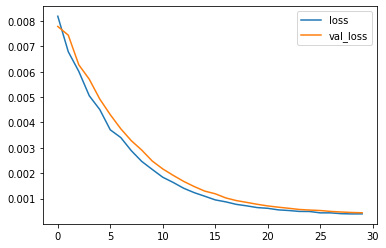

In [15]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()

In [16]:
target = Y[-N//2:]
preds = []

# first validation input
last_x = X[-N//2] # 1-D array of length T

while len(preds) < len(target):
  p = model.predict(last_x.reshape(1, -1, 1))[0,0] # 1x1 array -> scalar
  
  # update the predictions list
  preds.append(p)
  
  # make the new input
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

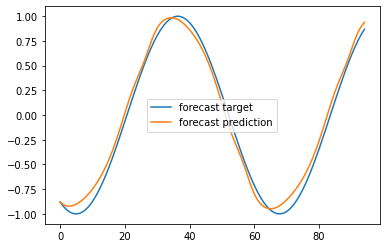

In [17]:
plt.plot(target, label='forecast target')
plt.plot(preds, label='forecast prediction')
plt.legend()

In [18]:
T1 = 10
X1 = []
Y1 = []
for t in range(len(noisy_seq)-T1):
  x1 = noisy_seq[t:t+T1]
  y1 = noisy_seq[t+T1]
  X1.append(x1)
  Y1.append(y1)
Y1 = np.array(Y1)
X1 = np.array(X1).reshape(-1,T1,1)
N = len(X1)
print("X1.shape", X1.shape, "Y1.shape", Y1.shape)

X1.shape (190, 10, 1) Y1.shape (190,)


In [19]:
i = Input(shape=(T1,1))
x = SimpleRNN(15)(i)
x = Dense(1)(x)
model = Model(i,x)

In [20]:
model.compile(loss='mse', optimizer=Adam(lr=0.001))
r = model.fit(x=X1[:N//2], y = Y1[:N//2], epochs = 60, validation_data=(X1[N//2:], Y1[N//2:]))

Epoch 1/60
3/3 [==============================] - 1s 81ms/step - loss: 0.1569 - val_loss: 0.1043
Epoch 2/60
3/3 [==============================] - 0s 15ms/step - loss: 0.0872 - val_loss: 0.0658
Epoch 3/60
3/3 [==============================] - 0s 14ms/step - loss: 0.0494 - val_loss: 0.0446
Epoch 4/60
3/3 [==============================] - 0s 14ms/step - loss: 0.0378 - val_loss: 0.0367
Epoch 5/60
3/3 [==============================] - 0s 15ms/step - loss: 0.0310 - val_loss: 0.0358
Epoch 6/60
3/3 [==============================] - 0s 15ms/step - loss: 0.0385 - val_loss: 0.0356
Epoch 7/60
3/3 [==============================] - 0s 15ms/step - loss: 0.0361 - val_loss: 0.0332
Epoch 8/60
3/3 [==============================] - 0s 14ms/step - loss: 0.0329 - val_loss: 0.0296
Epoch 9/60
3/3 [==============================] - 0s 78ms/step - loss: 0.0270 - val_loss: 0.0263
Epoch 10/60
3/3 [==============================] - 0s 15ms/step - loss: 0.0262 - val_loss: 0.0245
Epoch 11/60
3/3 [============

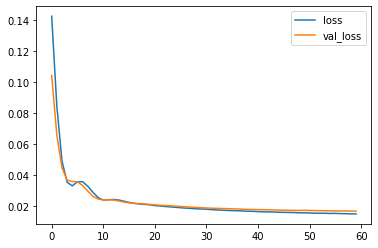

In [21]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()

In [22]:
target1 = Y1[-N//2:]
preds1 = []

# first validation input
last_x1 = X1[-N//2] # 1-D array of length T

while len(preds1) < len(target1):
  p = model.predict(last_x1.reshape(1, -1, 1))[0,0] # 1x1 array -> scalar
  
  # update the predictions list
  preds1.append(p)
  
  # make the new input
  last_x1 = np.roll(last_x1, -1)
  last_x1[-1] = p

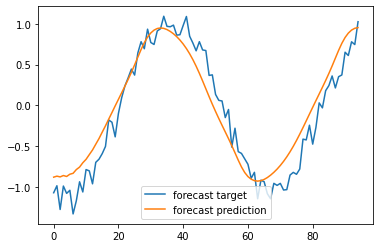

In [23]:
plt.plot(target1, label='forecast target')
plt.plot(preds1, label='forecast prediction')
plt.legend()

In [24]:
# It was able to capture the original periodicity of the sin wave.